# Business Analytics Project

## Intro

I am assigned the task of optimizing marketing expenses for Yandex.Afisha. My goal is to suggest sources/platforms that are most profitable. I will present the metrics I focused on and why. 

##  Download the data and prepare it for analysis

I have server logs from June 2017 through May 2018, this is the period I will analyze. Within that time period, I have a record of purchases as well. Finally, I have the marketing expenses stats. With my analysis I hope to answer the following questions: How do people use the product? When do they start to buy? How much money does each customer bring? When do they pay it off? 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
#Store the data on visits, orders, and expenses in variables
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


### visits 

In [3]:
#looking at column names, data types, number of rows&columns
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#make columns lowercase
visits.columns = [x.lower() for x in visits.columns]
visits

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [5]:
#make snakecase
visits = visits.rename(
    columns={
        'end ts': 'end_ts',
        'source id': 'source_id',
        'start ts': 'start_ts',
    }
)
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [6]:
#convert dtype
visits['end_ts'] = pd.to_datetime(
    visits['end_ts'], format="%Y-%m-%d %H:%M"
)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  object        
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](1), int64(1), object(2), uint64(1)
memory usage: 13.7+ MB


In [7]:
#convert dtype
visits['start_ts'] = pd.to_datetime(
    visits['start_ts'], format="%Y-%m-%d %H:%M"
)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
#convert dtype
visits['device'] = visits['device'].astype('category')

In [9]:
#how many (unique) sources(ads) are we working with
#the range is missing the number 8 : investigate 
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [10]:
#which source is most popular
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [11]:
#check for missing values
visits.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

### orders 

In [12]:
#looking at column names, data types, number of rows&columns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
#make columns lowercase
orders.columns = [x.lower() for x in orders.columns]
orders

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [14]:
#make snakecase
orders = orders.rename(
    columns={
        'buy ts': 'buy_ts'
    }
)
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [15]:
#convert dtype
orders['buy_ts'] = pd.to_datetime(
    orders['buy_ts'], format="%Y-%m-%d %H:%M"
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
#check for missing values
orders.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

### costs

In [17]:
#looking at column names, data types, number of rows&columns
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
#change dt to date
costs = costs.rename(
    columns={
        'dt': 'date'
    }
)
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   date       2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [19]:
#convert dtype
costs['date'] = pd.to_datetime(
    costs['date'], format="%Y-%m-%d %H:%M"
)
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [20]:
#how many (unique) sources(ads) are we working with
#the range is missing the numbers 6, 7, 8 : investigate 
costs['source_id'].unique()


array([ 1,  2,  3,  4,  5,  9, 10])

In [21]:
#which source is most popular
costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [22]:
#check for missing values
costs.isnull().sum()

source_id    0
date         0
costs        0
dtype: int64

## Make reports and calculate metrics

### Product 

#### How many people use the product daily, weekly, monthly?

In [23]:
#make session year, month and week
visits['session_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date']  = visits['start_ts'].dt.date


In [24]:
#find the total daily/weekly/monthly average users
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

print('daily average user:', int(dau_total))
print('weekly average user:', int(wau_total))
print('monthly average user:', int(mau_total))


daily average user: 907
weekly average user: 5724
monthly average user: 23228


##### Month 

In [25]:
#average user per month
dau_monthly = {}

for month, df in visits.groupby('session_month'):
    key = month.strftime('%Y-%m')
    value = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
    dau_monthly[key] = int(value)

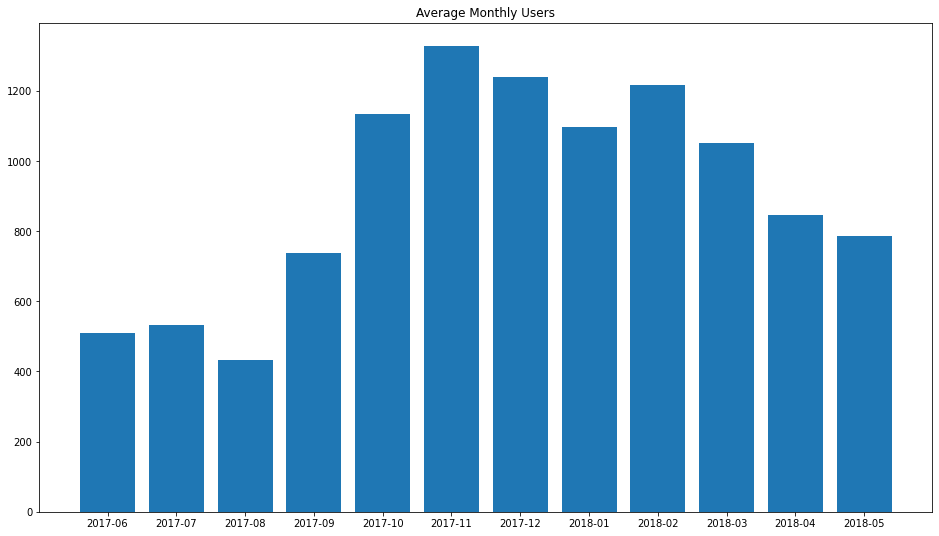

In [26]:
#add bar chart for analysis
x = [x.replace(' 00:00:00', '') for x in dau_monthly.keys()]
y = dau_monthly.values()

plt.figure(figsize=(16,9))
plt.title('Average Monthly Users')
plt.bar(x,y)
plt.show()

##### Week

In [27]:
dau_weekly = {}

for week, df in visits.groupby('session_week'):
    key = week.strftime('%Y-%m-%W')
    value = df.groupby('session_week').agg({'uid': 'nunique'}).mean()
    dau_weekly[key] = int(value)

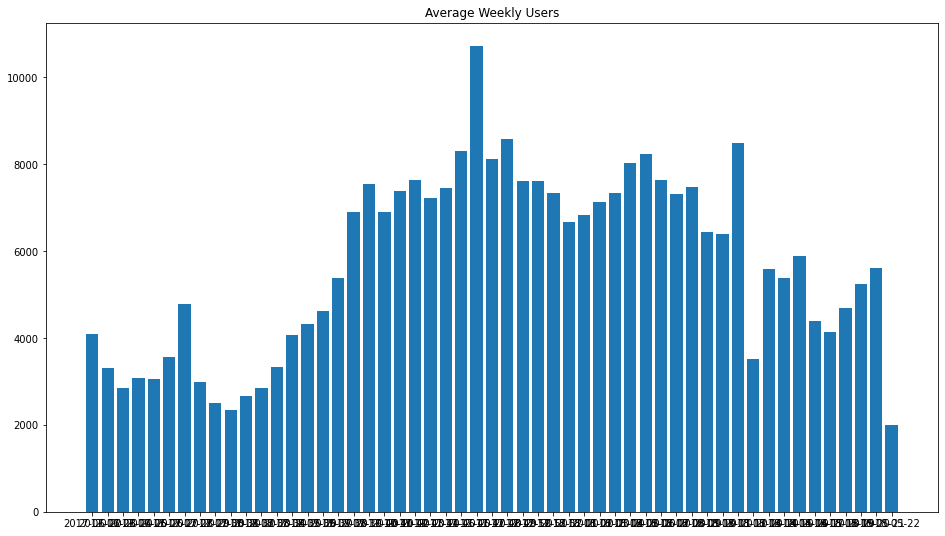

In [28]:
#add bar chart for analysis
x = [x.replace(' 00:00:00', '') for x in dau_weekly.keys()]
y = dau_weekly.values()

plt.figure(figsize=(16,9))
plt.title('Average Weekly Users')
plt.bar(x,y)
plt.show()

##### Day 

In [29]:
dau_daily = {}

for day, df in visits.groupby('session_date'):
    key = day.strftime('%Y-%m-%w-%d')
    value = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
    dau_daily[key] = int(value)

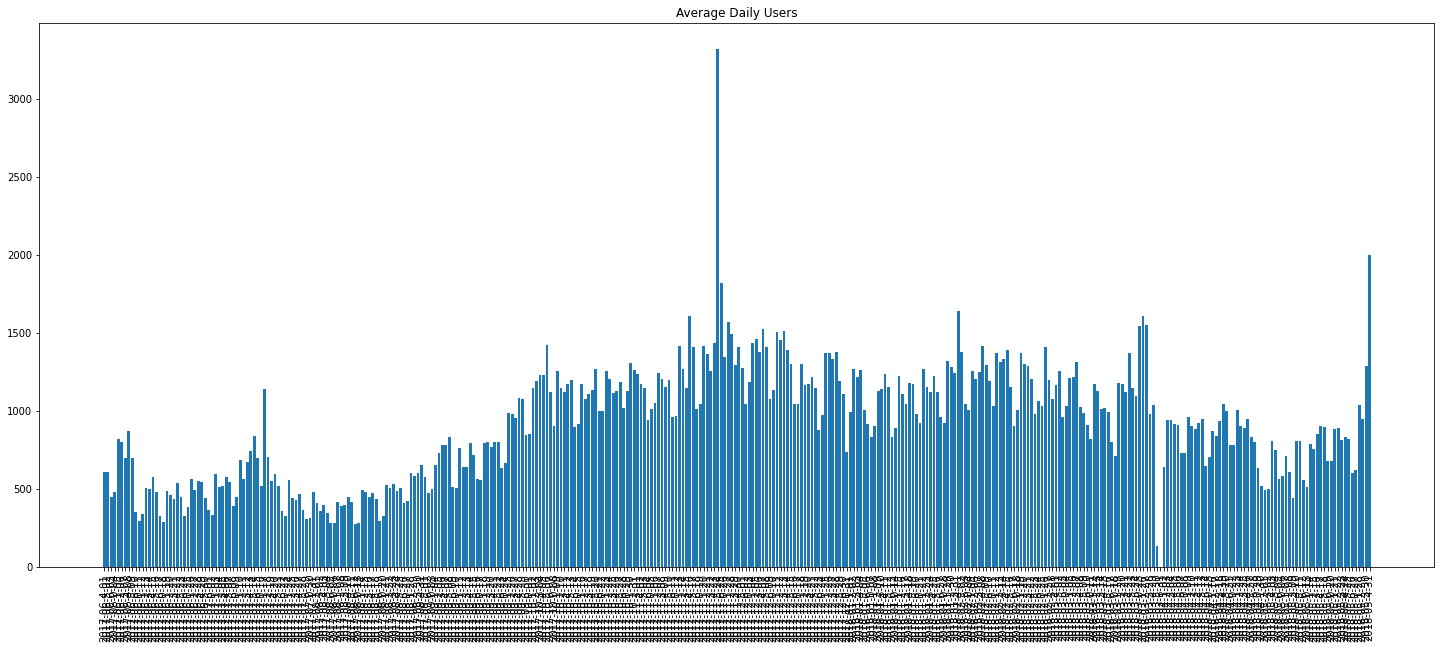

In [30]:
#add bar chart for analysis
x = [x.replace(' 00:00:00', '') for x in dau_daily.keys()]
y = dau_daily.values()



plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.title('Average Daily Users')
plt.bar(x,y)
plt.show()


Note the MAU increased from Aug 2017 - November 2017(peak = 1200). Over the next three months I notice a slight, but steady decline. Despite a decline, we have higher MAU in May 2018, than June 2017. The WAU & DUA reflects the same user incline and decline trend - however they are more detailed. For example, the highest MAU was 2017-11. When we break down that month into seperate weeks we can see one week performed signnifcantly  higher than the others. Breaking down that week into days:  it seems one day had a significantly higher DUA count. I would consider this day an outlier, but I would need to further investigate to know if this was based on marketing or technical issue.

#### How many sessions per user per month? 

Users are active once a month, on average. Although the average is slightly over 1.0 - it's not possible for users to have a fraction of a session. Therefore, I round to the closest whole number.

#### What is the length of each session?

In [31]:
#What is the length of each session
visits['session_duration'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19


In [32]:
# for analysis 
visits['session_duration'].describe()


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [33]:
#most common time
visits['session_duration'].mode()

0    60
dtype: int64

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


Text(0, 0.5, '# of Users')

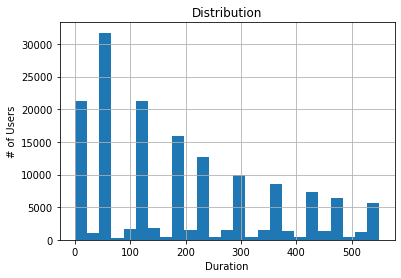

In [35]:
#add bar chart for analysis

distribution = visits.pivot_table(index='uid', values='session_duration')

distribution.hist('session_duration', bins=25, range=(0,550))

plt.title('Distribution')
plt.xlabel('Duration')
plt.ylabel('# of Users')

By making a graph, I can see the distribution of duration values for the user's. I can see which duration is most common. Over 30k fall near the 60 second mark. Nearly 20k fall near the zero.

Average session is 634.5 seconds(roughly 10 mins). I observe common values be between 120-840 seconds (2-14 mins). The most common session length is 60 seconds. 

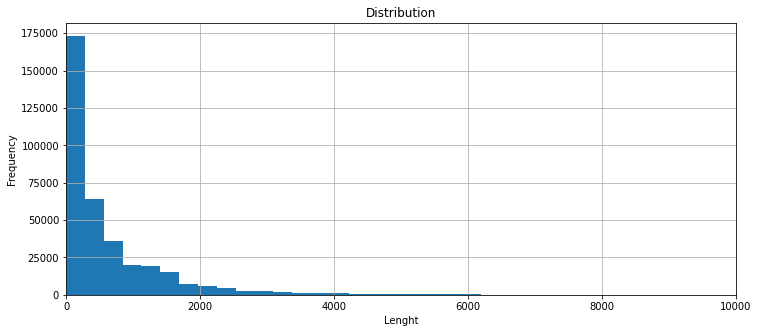

In [36]:
plt.figure(figsize= (12,5))
visits['session_duration'].hist(bins=300).set(title = 'Distribution', xlabel = 'Lenght', ylabel = 'Frequency')
plt.xlim(0,10000)
plt.show()

#### What's the user retention rate (users that come back within the first month of their first visit) ?

In [37]:
#first visit = group users by their min start_ts
#name columns
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

In [38]:
#analyze
first_visits.head()

,uid,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [39]:
#add the columns with date, year, month and week of the first session
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_week'] = first_visits['first_session_start_ts'].astype('datetime64[W]')
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')
first_visits['first_session_year'] = first_visits['first_session_start_ts'].astype('datetime64[Y]')


In [40]:
# merge first_visits to orginal visits and rename vis
vis = pd.merge(first_visits, visits, on = 'uid')

In [41]:
#age = time betweeen first session and every following session
vis['age_days'] = vis['session_date'] - vis['first_session_dt']
vis['age_months'] = ((vis['session_month'] - vis['first_session_month']) / np.timedelta64(1,'M')).round().astype('int')
vis['age_weeks'] = vis['session_week'] - vis['first_session_week']

In [42]:
# make a cohort for number of users for each age_month 
cohorts = vis.pivot_table(index='first_session_month',
                  columns='age_months',
                  values='uid',
                  aggfunc='nunique')



In [43]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [44]:
#rentention rate 
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]], axis=1)
retention.columns = cohorts.columns

In [45]:
#analyze
retention.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01 00:00:00,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01 00:00:00,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01 00:00:00,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01 00:00:00,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01 00:00:00,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01 00:00:00,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01 00:00:00,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01 00:00:00,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01 00:00:00,1.0,0.05708,0.025454,0.020093,,,,,,,,
2018-03-01 00:00:00,1.0,0.041818,0.027053,,,,,,,,,


In [46]:
#what percent of users come back the following month of their first visit?
print('{0:.0%} of users return the following month after their first visit '.format(retention[1].mean())) 


7% of users return the following month after their first visit 


<AxesSubplot:>

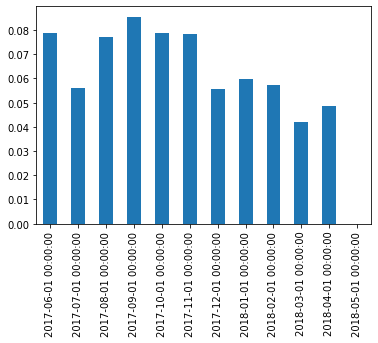

In [47]:
#analyze
retention[1].plot(kind='bar')

<AxesSubplot:title={'center':'User rentention'}, xlabel='age_months'>

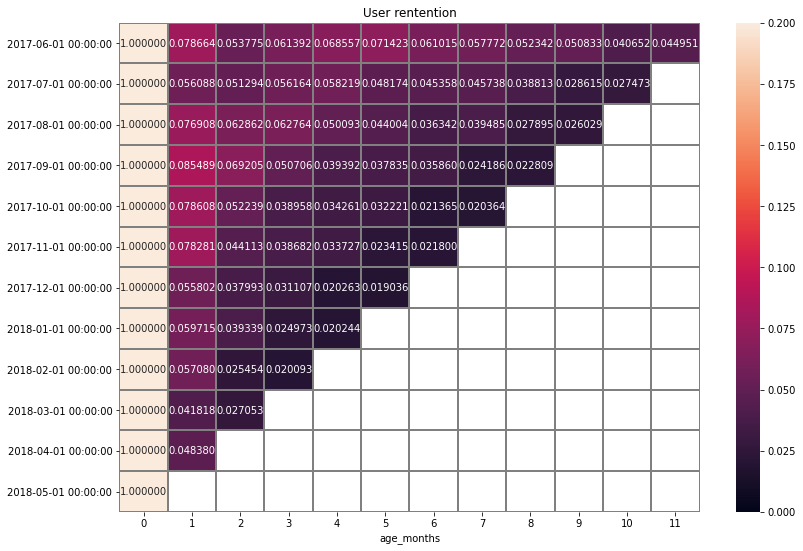

In [48]:
plt.figure(figsize=(13, 9))
plt.title('User rentention')
sns.heatmap(
    retention,
    vmin=0.0,
    vmax=0.2,
    annot=True,
    fmt='1f',
    linewidths=1,
    linecolor='gray',
) 

Rentention rate fluctuates between 8% - 4%. 2018 has lower retention rates than 2017 on average.  

### Sales 

#### How much Afisha earns daily, weekly, monthly

In [49]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [50]:
# make column for day, week, month and year 
orders['order_dt']    = orders['buy_ts'].dt.date
orders['order_week']  = orders['buy_ts'].astype('datetime64[W]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_year'] = orders['buy_ts'].astype('datetime64[Y]')


##### Daily 

In [51]:
# daily sales = get count & sum of revenue and group by the order date
sales_daily = orders.groupby('order_dt').agg({'revenue': ['count', 'sum']})


<AxesSubplot:xlabel='order_dt'>

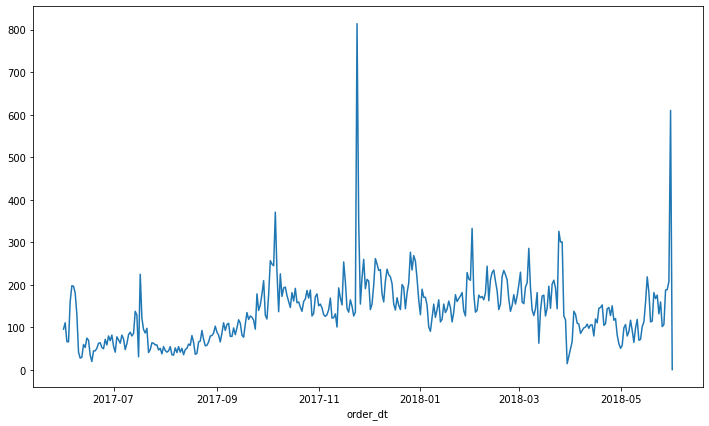

In [52]:
#analyze to see the number of purchases over 364days
sales_daily['revenue']['count'].plot(figsize=(12,7))

<AxesSubplot:ylabel='Frequency'>

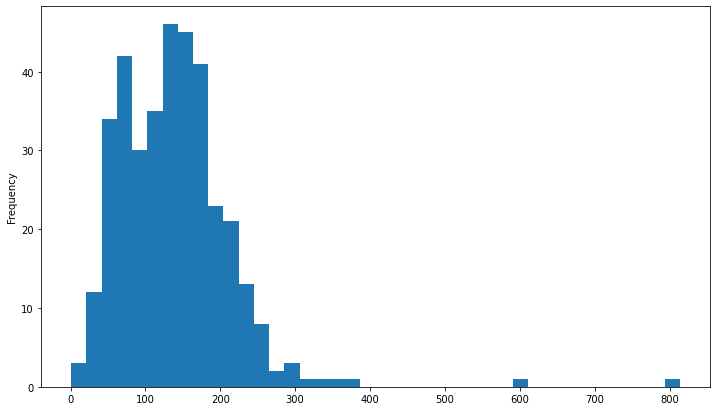

In [53]:
#analyze with hist to see the frequency of #of purchases over 364days
sales_daily['revenue']['count'].plot(kind='hist', figsize=(12,7), bins=40)


<AxesSubplot:xlabel='order_dt'>

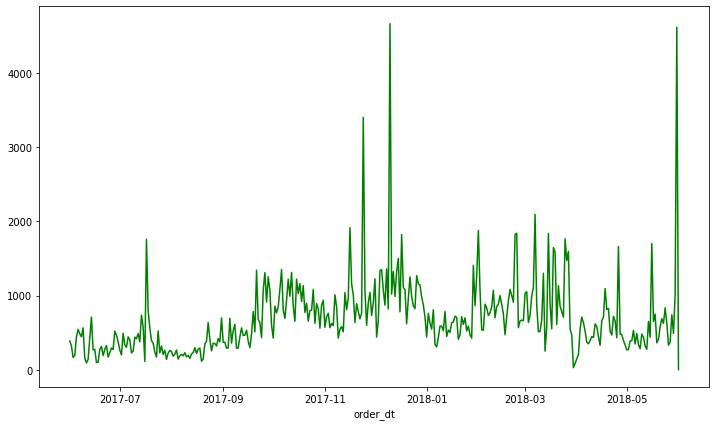

In [54]:
#anayze the revenue over 364days
sales_daily['revenue']['sum'].plot(figsize=(12,7), color='green')

<AxesSubplot:ylabel='Frequency'>

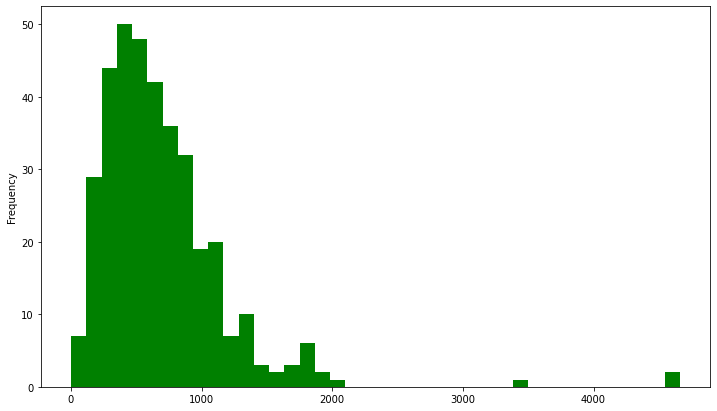

In [55]:
#study the frequency of revenue over 364days
sales_daily['revenue']['sum'].plot(figsize=(12,7), color='green', kind='hist', bins=40)



In [56]:
sales_daily.describe()

revenue             
            count          sum
count  364.000000   364.000000
mean   138.502747   692.464835
std     76.858480   503.309340
min      1.000000     3.420000
25%     82.750000   378.907500
50%    136.000000   596.850000
75%    177.000000   869.780000
max    814.000000  4661.330000

##### Weekly

In [57]:
# daily sales = get count & sum of revenue and group by the order week
sales_weekly = orders.groupby('order_week').agg({'revenue': ['count', 'sum']})


<AxesSubplot:xlabel='order_week'>

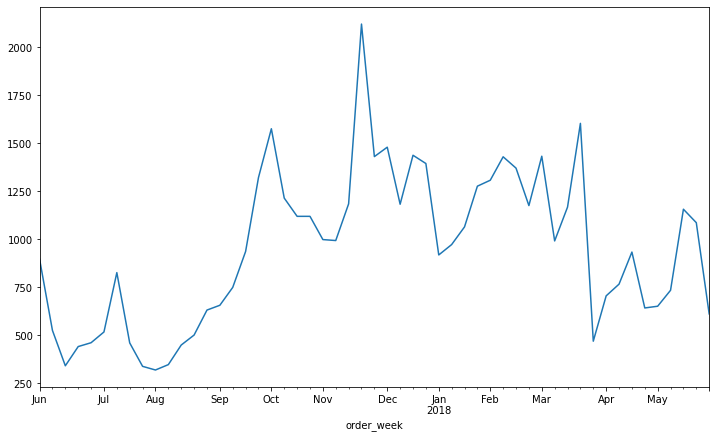

In [58]:
##analyze to see the purchase count overtime
sales_weekly['revenue']['count'].plot(figsize=(12,7))


<AxesSubplot:ylabel='Frequency'>

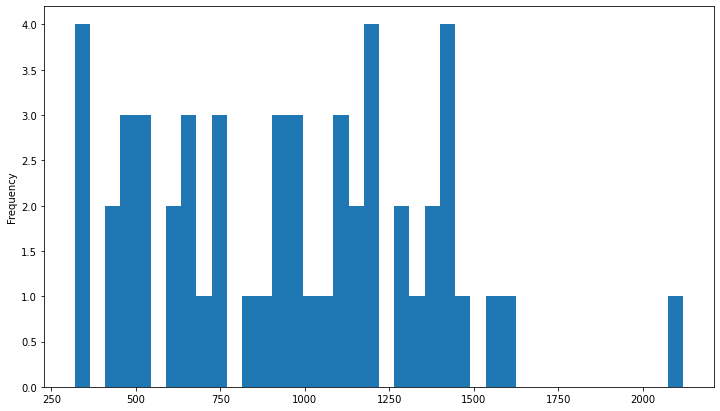

In [59]:
#analyze with hist to see the frequency of #of purchases
sales_weekly['revenue']['count'].plot(kind='hist', figsize=(12,7), bins=40)


<AxesSubplot:xlabel='order_week'>

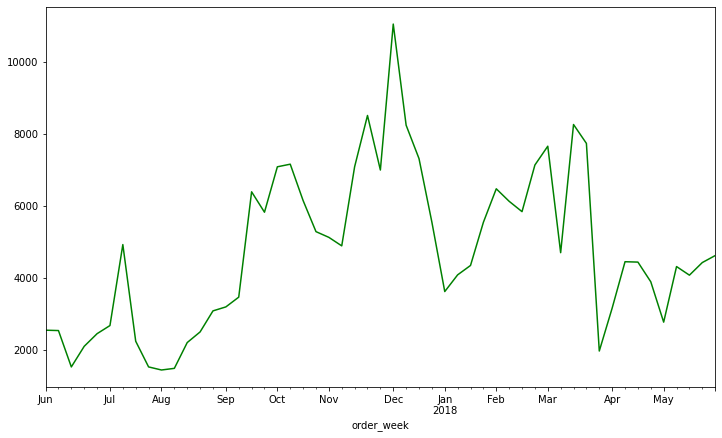

In [60]:
#analyze weekly revenue
sales_weekly['revenue']['sum'].plot(figsize=(12,7), color='green')

<AxesSubplot:ylabel='Frequency'>

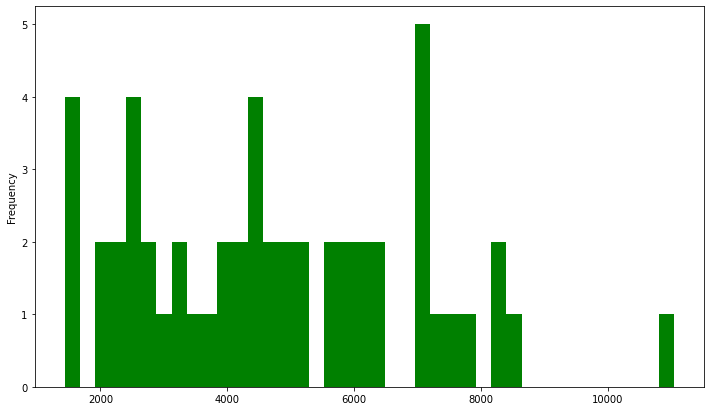

In [61]:
#study the frequency of revenue
sales_weekly['revenue']['sum'].plot(figsize=(12,7), color='green', kind='hist', bins=40)


In [62]:
sales_weekly.describe()

revenue              
             count           sum
count    53.000000     53.000000
mean    951.226415   4755.796226
std     405.229880   2210.315863
min     319.000000   1442.060000
25%     631.000000   2770.330000
50%     972.000000   4446.760000
75%    1214.000000   6386.730000
max    2120.000000  11041.610000

##### Monthly 

In [63]:
# daily sales = get count & sum of revenue and group by the order week
sales_monthly = orders.groupby('order_month').agg({'revenue': ['count', 'sum']})


<AxesSubplot:xlabel='order_month'>

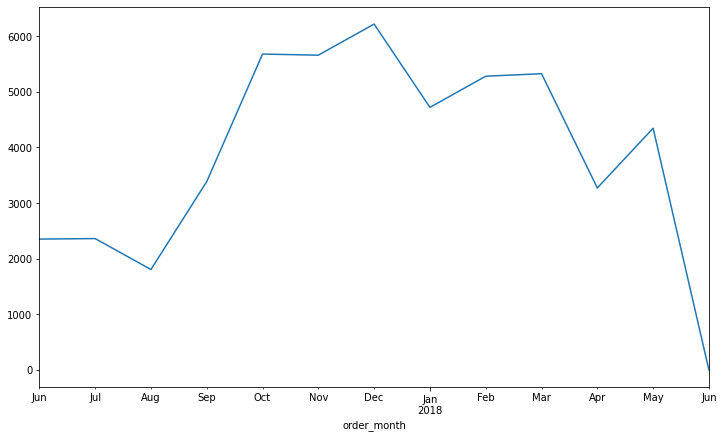

In [64]:
##analyze to see the purchase count overtime
sales_monthly['revenue']['count'].plot(figsize=(12,7))


<AxesSubplot:ylabel='Frequency'>

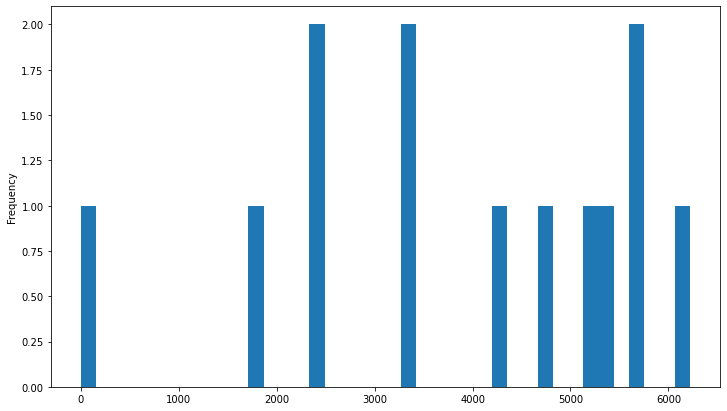

In [65]:
#analyze with hist to see the frequency of #of purchases
sales_monthly['revenue']['count'].plot(kind='hist', figsize=(12,7), bins=40)


<AxesSubplot:xlabel='order_month'>

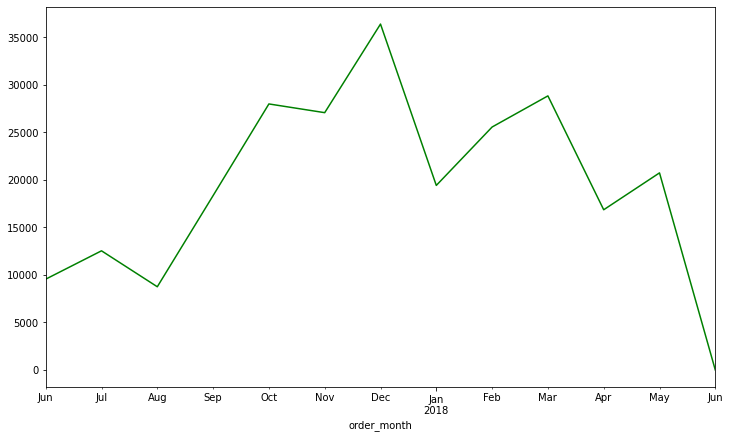

In [66]:
#analyze sales_monthly revenue
sales_monthly['revenue']['sum'].plot(figsize=(12,7), color='green')


<AxesSubplot:ylabel='Frequency'>

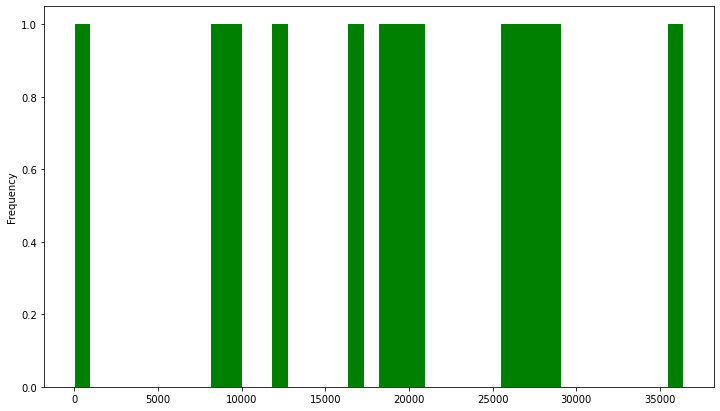

In [67]:
#study the frequency of revenue
sales_monthly['revenue']['sum'].plot(figsize=(12,7), color='green', kind='hist', bins=40)


In [68]:
sales_monthly.describe()

revenue              
             count           sum
count    13.000000     13.000000
mean   3878.076923  19389.015385
std    1858.113401   9962.071481
min       1.000000      3.420000
25%    2363.000000  12539.470000
50%    4346.000000  19417.130000
75%    5326.000000  27069.930000
max    6218.000000  36388.600000

Daily revenue is highest between 2017-11 & 2017-12. Daily revenue tends to range between 378-869. It's uncommon to make > $1000 per day. 

Weekly revenue follows the same trend as daily, we see growth and peak 2017-12, then a significant decline the following week. The range for weekly revenue is 2770-6386. 

Monthly revenue shows similar growth and decline of revenue. The range for monthly revenue is 12,539-27,069.  

#### What is the average purchase size?

In [69]:
#daily/weekly/monthly column for rev/count
sales_daily['av_check'] = sales_daily['revenue']['sum'] / sales_daily['revenue']['count']
sales_weekly['av_check'] = sales_weekly['revenue']['sum'] / sales_weekly['revenue']['count']
sales_monthly['av_check'] = sales_monthly['revenue']['sum'] / sales_monthly['revenue']['count']

##### Daily

<AxesSubplot:xlabel='order_dt'>

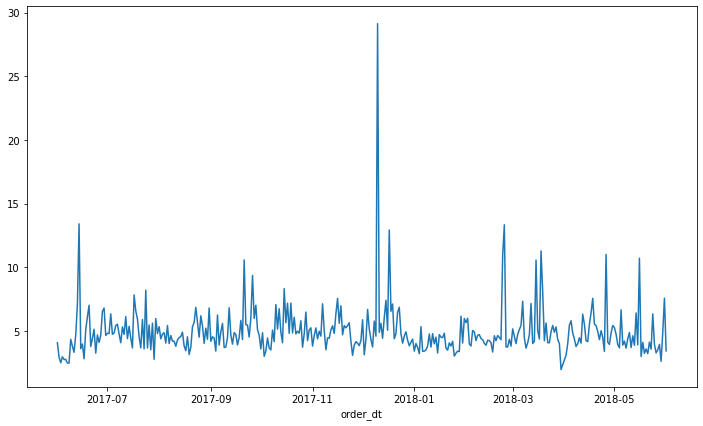

In [70]:
sales_daily['av_check'].plot(figsize=(12,7))


In [71]:
sales_daily['av_check'].describe()

count    364.000000
mean       4.936188
std        2.021881
min        1.948000
25%        3.960635
50%        4.561548
75%        5.411037
max       29.133313
Name: av_check, dtype: float64

##### Weekly

<AxesSubplot:xlabel='order_week'>

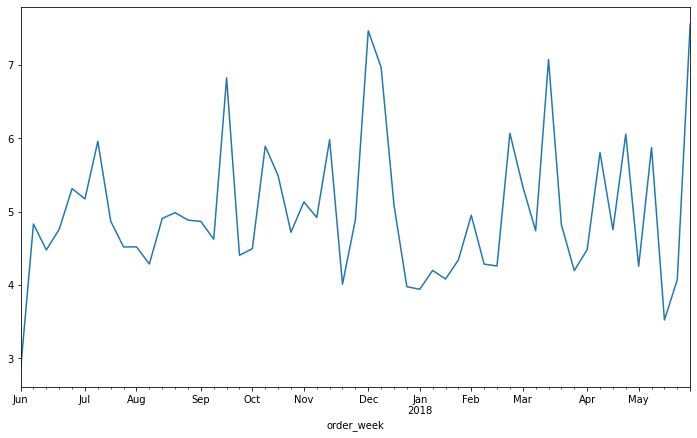

In [72]:
sales_weekly['av_check'].plot(figsize=(12,7))

In [73]:
sales_weekly['av_check'].describe()

count    53.000000
mean      4.995856
std       0.967166
min       2.842254
25%       4.342249
50%       4.831448
75%       5.343722
max       7.557021
Name: av_check, dtype: float64

##### Monthly 

<AxesSubplot:xlabel='order_month'>

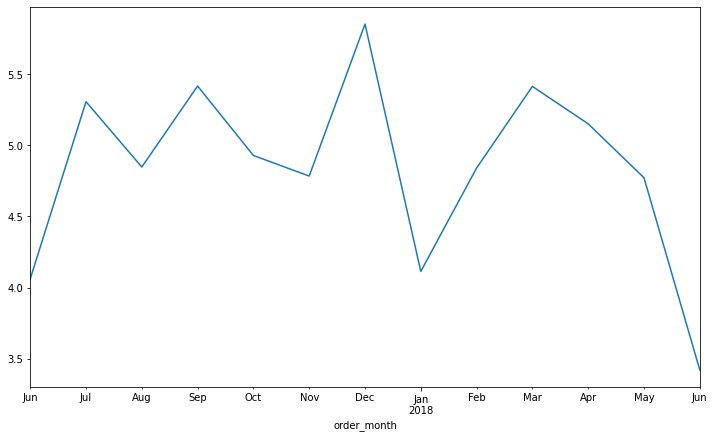

In [74]:
sales_monthly['av_check'].plot(figsize=(12,7))


In [75]:
sales_monthly['av_check'].describe()

count    13.000000
mean      4.838700
std       0.656336
min       3.420000
25%       4.771279
50%       4.847139
75%       5.306589
max       5.852139
Name: av_check, dtype: float64

The average purchase is roughly $5. By comparing daily, weekly, and monthly averages: I can determine that the average purchase doesn't change.

#### How many days are there usually between the first visit and the first order?

In [76]:
# first purchase day/week/month for each customer
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')
first_orders.head()


,uid,first_order_ts,first_order_dt,first_order_month,first_order_week
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-12-28
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-05
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-25
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-23


In [77]:
#merge orders and visits data on uid
buyers = pd.merge(first_visits, first_orders, on='uid')


In [78]:
#to_datetime
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

<AxesSubplot:ylabel='Frequency'>

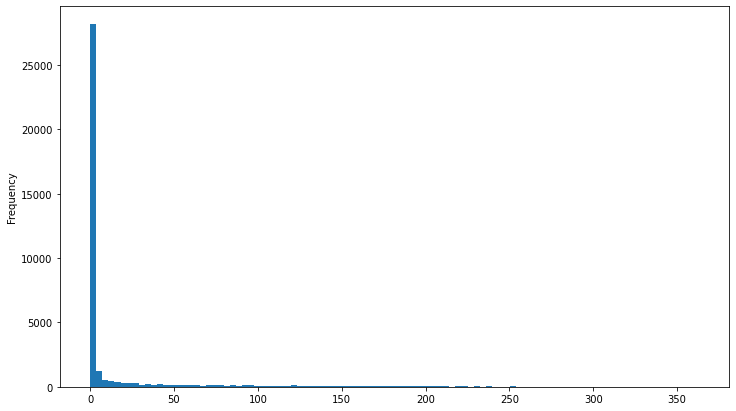

In [79]:
#how many days = order date-first session 
buyers['days_to_first_purchase'] = ((buyers['first_order_dt'] - buyers['first_session_dt']) / np.timedelta64(1,'D')).astype('int')
buyers['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7))

In [80]:
buyers['days_to_first_purchase'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_first_purchase, dtype: float64

Q1 and Q2 indicate users take zero days between their first visit and first purchase, meaning the same day. Q3 shows 2 days. In some rare cases, users waited 363 days to make a purchase.  

#### How many orders does a single user usually make and what revenue does he bring during six months after his first order?

In [81]:
#make a cohort for users first order

cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
.groupby(['first_order_month', 'order_month'])\
.agg({'revenue': ['sum', 'count']}).reset_index()


In [82]:
#find each cohort age
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']

In [83]:
#merge cohort with cohort sizes 
#find revenue per buyer, and #of orders per buyer
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']


In [84]:
#How much rev does user bring within 6mo after first order
cohorts_age = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='rev_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_age.fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


In [85]:
# cumulative revenue and #of orders per user

cohorts_age = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values=['rev_per_buyer', 'orders_per_buyer'], 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_age.fillna('')

orders_per_buyer                                          \
age_month                     0.0       1.0       2.0       3.0       4.0    
first_order_month                                                            
2017-06-01                1.163618  1.251112  1.337123  1.448838  1.593178   
2017-07-01                1.136765  1.188768   1.25117  1.305252  1.342694   
2017-08-01                1.118978   1.19781  1.270803  1.329927  1.391971   
2017-09-01                1.136381  1.221232  1.283611  1.347152  1.373111   
2017-10-01                1.143779  1.216129  1.253456  1.281567   1.31129   
2017-11-01                1.179368  1.276648  1.321245  1.372948  1.406273   
2017-12-01                1.152635  1.214237  1.260324  1.301164  1.320785   
2018-01-01                1.121554  1.187963  1.235102  1.254076  1.277201   
2018-02-01                1.121611  1.182416  1.205149  1.224322             
2018-03-01                1.168978   1.21936  1.269176                       
2018-04-01                1.096221  1.181898                                 
2018-05-01                1.087349                                           
2018-06-01                1.000000                                           

                                                                     ...  \
age_month              5.0       6.0       7.0       8.0       9.0   ...   
first_order_month                                                    ...   
2017-06-01         1.700939   1.83737  1.923381  2.028176  2.103806  ...   
2017-07-01         1.385335  1.417057  1.443058  1.473219  1.485699  ...   
2017-08-01         1.437226  1.472993  1.529927  1.563504   1.59708  ...   
2017-09-01         1.415343  1.457187  1.478884  1.502518            ...   
2017-10-01         1.335023  1.354839  1.383641                      ...   
2017-11-01          1.42073  1.445724                                ...   
2017-12-01         1.344741                                          ...   
2018-01-01                                                           ...   
2018-02-01                                                           ...   
2018-03-01                                                           ...   
2018-04-01                                                           ...   
2018-05-01                                                           ...   
2018-06-01                                                           ...   

                  rev_per_buyer                                              \
age_month                  2.0        3.0        4.0        5.0        6.0    
first_order_month                                                             
2017-06-01             7.841152   8.795823   9.818354  10.553856  11.504296   
2017-07-01              8.48222   8.841196   9.017988   9.174035   9.294243   
2017-08-01             7.804073    8.19535   8.689401   8.972942   9.183606   
2017-09-01             8.785564  12.761356  13.161914  13.808981  14.510589   
2017-10-01              7.11453   7.271675   7.423235   7.543597   7.628412   
2017-11-01             7.199196   7.524148   7.672161    7.72604   7.840968   
2017-12-01             7.268403   8.333678   8.646607   8.984654              
2018-01-01             6.011877   6.154655   6.217353                         
2018-02-01             5.738099   5.812243                                    
2018-03-01              6.72443                                               
2018-04-01                                                                    
2018-05-01                                                                    
2018-06-01                                                                    

                                                                          
age_month               7.0        8.0        9.0        10.0       11.0  
first_order_month                                                         
2017-06-01         12.085887    12.6391  13.244889  13.816149 

In [86]:
cohorts_age['orders_per_buyer'][5].mean(), cohorts_age['rev_per_buyer'][5].mean()

print('On average, users make 1.43 orders within 6mo and bring $9.53 in revenue')

On average, users make 1.43 orders within 6mo and bring $9.53 in revenue


In [87]:
cohorts_report['ltv'] = cohorts_report['revenue']/ cohorts_report['n_buyers']
cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue,n_orders,age_month,rev_per_buyer,orders_per_buyer,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2354,0.0,4.724414,1.163618,4.724414
1,2017-06-01,2023,2017-07-01,981.82,177,1.0,0.485329,0.087494,0.485329
2,2017-06-01,2023,2017-08-01,885.34,174,2.0,0.437637,0.086011,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,226,3.0,0.954671,0.111715,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,292,4.0,1.022531,0.144340,1.022531


<AxesSubplot:title={'center':'Cohorts: LTV'}, xlabel='age_month', ylabel='order_month'>

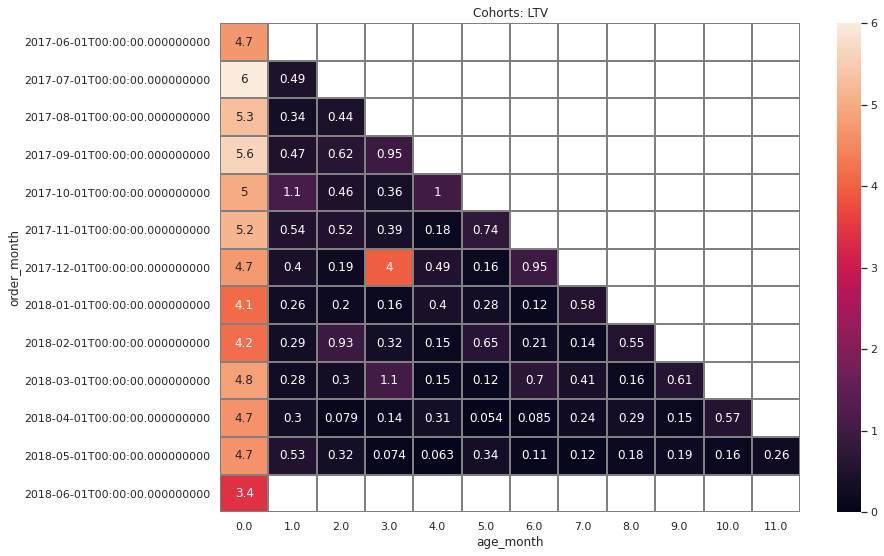

In [88]:
ltv_pivot = cohorts_report.pivot_table(
    index='order_month',
    columns='age_month',
    values='ltv',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(ltv_pivot, vmin=0.0, vmax=6.0, annot=True, linewidths=1, linecolor='gray')

Calculating LTVm provides the value of a customer over the 6mo period that we selected. In this case, I made the conclusion that on average, users make 1.43 orders within 6mo and bring $9.53 in revenue. I took the revenue/#of buyers to find LTV. The heatmap highlights the 12-01-2017 in age month 3 - the only period that made a significant increase.

### Marketing 

#### How much was spent in marketing: daily, weekly, and monthly

In [89]:
#daily/weekly/monthly cost for marketing

costs['costs_year'] = costs['date'].astype('datetime64[Y]')
costs['costs_month'] = costs['date'].astype('datetime64[M]')
costs['costs_week'] = costs['date'].astype('datetime64[W]')


In [90]:
print('Overall, ${} was spent'.format(costs['costs'].sum()))

Overall, $329131.62 was spent


In [91]:
#we used different sources for marketing: what is the cost of each
print('Costs per sources:')
print(costs.groupby('source_id').agg({'costs': 'sum'}))

Costs per sources:
               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


In [92]:
print('Costs per month:')
print(costs.groupby('costs_month').agg({'costs': 'sum'}))

Costs per month:
                costs
costs_month          
2017-06-01   18015.00
2017-07-01   18240.59
2017-08-01   14790.54
2017-09-01   24368.91
2017-10-01   36322.88
2017-11-01   37907.88
2017-12-01   38315.35
2018-01-01   33518.52
2018-02-01   32723.03
2018-03-01   30415.27
2018-04-01   22289.38
2018-05-01   22224.27


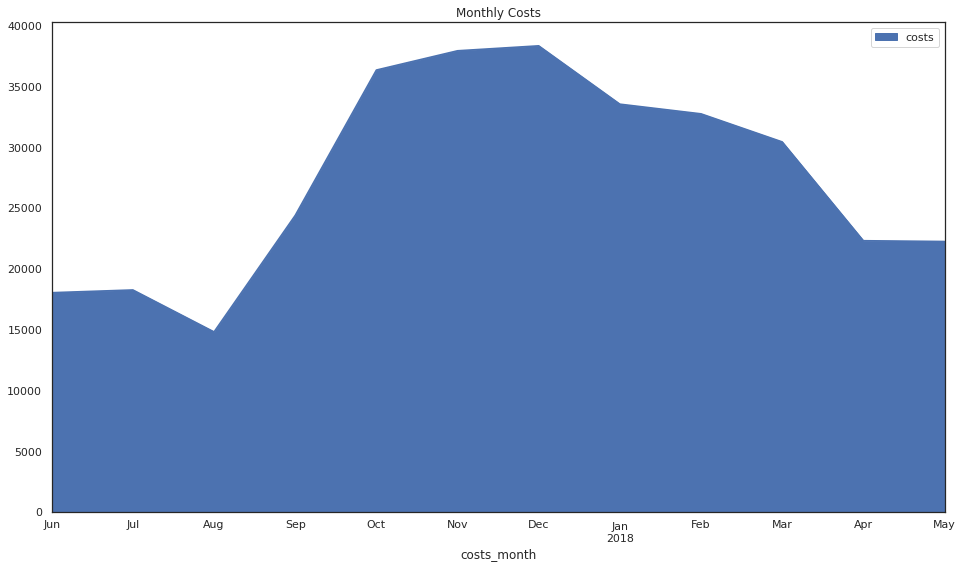

In [93]:
#plot the monthly costs per marketing sources 
costs.pivot_table(index='costs_month', values='costs', aggfunc='sum').plot.area(figsize=(16,9), title='Monthly Costs')
plt.show()

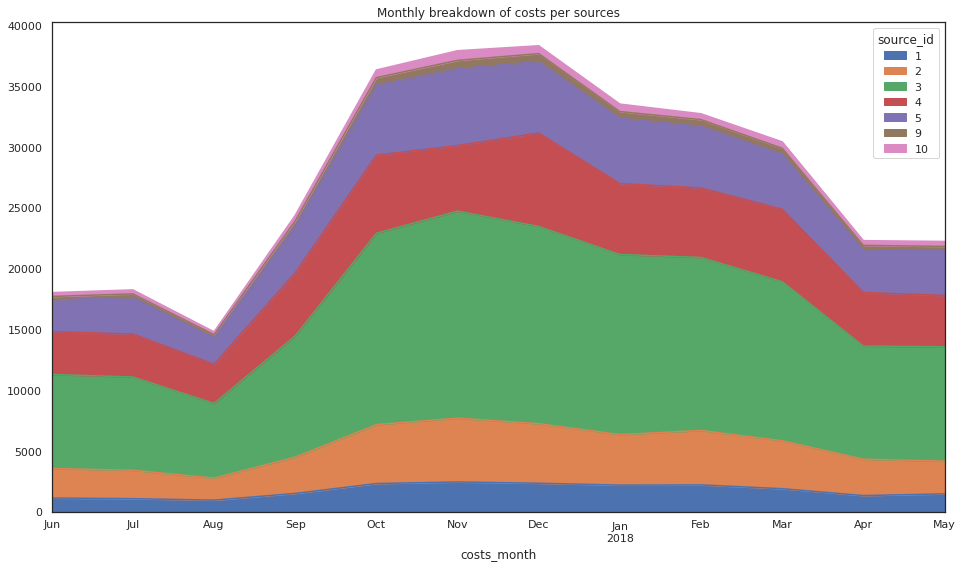

In [94]:
#plot the costs per month 
costs.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum').plot.area(figsize=(16,9), title='Monthly breakdown of costs per sources')
plt.show()

Nearly $330k was spent on marketing. Source 3 was most expensive, Sources 9&10 are the least expensive. 

#### How much did customer acquisition from each of the sources cost??

In [95]:
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_dt,first_order_month,first_order_week,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2017-12-28,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-10-05,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-25,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-23,0


In [96]:
#what marketing source did each user come from?
users = visits.sort_values('start_ts').groupby('uid').first()


In [97]:
#name column
users = users[['source_id']]

In [98]:
#merge the source_id column from users to buyrs, on uid
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)

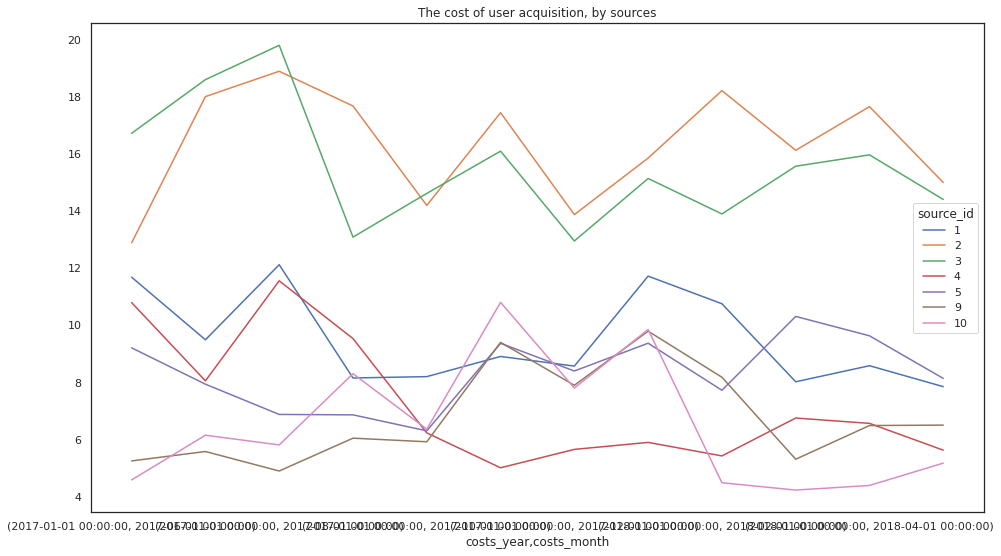

In [99]:
#group buyers by their SOURCE based on their first order
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
#rename columns
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
#to_datetime
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
#merge first_order_date column into costs on source based on their first purchase
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'date'])
#costs per buyer = costs/# of buyers 
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']
#analyze
costs_.pivot_table(index=['costs_year', 'costs_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(figsize=(16,9), title='The cost of user acquisition, by sources')
plt.show()

In [100]:
#look at 2018 closer
costs_per_buyer = costs_.loc[costs_['costs_year'] == '2018-01-01'].groupby('source_id')[['costs_per_buyer']].describe()

In [101]:
print('The average customer acquisition cost by sources in 2018')
costs_per_buyer['costs_per_buyer']['mean']

The average customer acquisition cost by sources in 2018


source_id
1      9.378239
2     16.520196
3     14.996488
4      6.052137
5      9.045279
9      7.360677
10     5.665786
Name: mean, dtype: float64

In [102]:
print('CAC total per month:')
print(costs_.groupby('costs_month').agg({'costs_per_buyer': 'sum'}))

CAC total per month:
             costs_per_buyer
costs_month                 
2017-06-01       2077.510355
2017-07-01       2171.987669
2017-08-01       2358.039880
2017-09-01       2049.181571
2017-10-01       1892.277424
2017-11-01       2281.016506
2017-12-01       1956.878227
2018-01-01       2366.975986
2018-02-01       1882.149765
2018-03-01       1961.514555
2018-04-01       1920.082652
2018-05-01       1882.574752


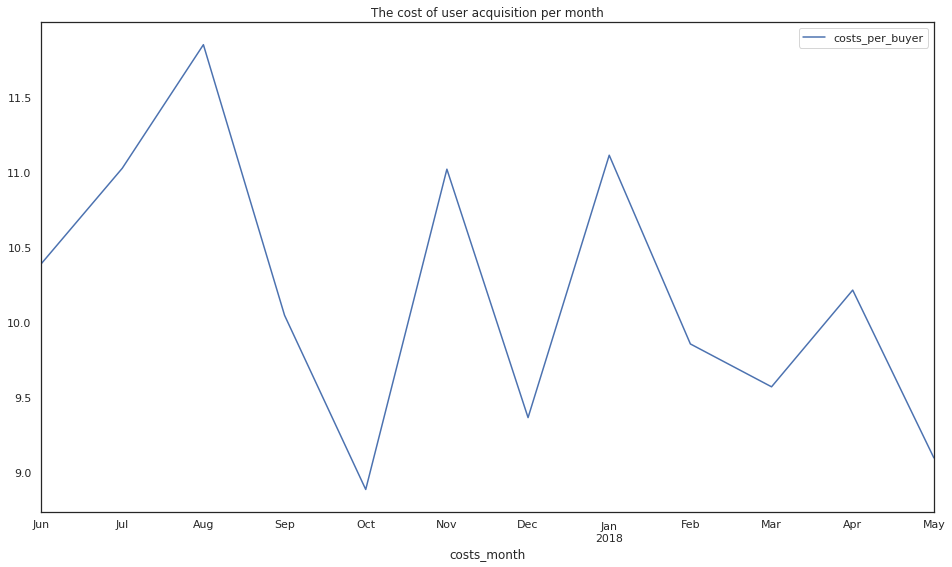

In [103]:
costs_.pivot_table(index='costs_month', values='costs_per_buyer', aggfunc='mean').plot(figsize=(16,9), title='The cost of user acquisition per month')
plt.show()

When removing older data, we have more accurate information. Above I observe the highest CAC is source 3

#### What is the return on marketing investment(ROMI) within 6mo? 

In [104]:
# compare CAC to LTV
#find LTV

ltv = {}

for source, df in buyers.groupby('source_id'):
    print(source, df.shape)
#cohorts are grouped by first order month
    cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
#merge cohorts into df 
#group by first order month, and order month
#revenue sum and count
    cohorts = pd.merge(orders, df, how='inner', on='uid')\
    .groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': ['sum', 'count']}).reset_index()
#age is any order momth - first order month
#rename columns
    cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']
#merge cohorts on the first order month 
#revenue per buyer = revenue/#of buyers
#orders per buyer = #of orders/ #of buyers
    cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
    cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

    #monthly cumulative revenue per user

    cohorts_age = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='rev_per_buyer', 
        aggfunc='sum'
    ).cumsum(axis=1)
    
    try: 
        ltv[source] = cohorts_age[5].mean()
    except KeyError:
        pass


1 (2899, 12)
2 (3506, 12)
3 (10473, 12)
4 (10296, 12)
5 (6931, 12)
7 (1, 12)
9 (1088, 12)
10 (1329, 12)


In [105]:
#average cost to aquire a customer per source
cac = costs_per_buyer['costs_per_buyer']['mean']
cac

source_id
1      9.378239
2     16.520196
3     14.996488
4      6.052137
5      9.045279
9      7.360677
10     5.665786
Name: mean, dtype: float64

In [106]:
#average return on marketing invesment
romi = {k:ltv[k]/v for k,v in cac.items()}
romi

{1: 1.2807934229597793,
 2: 0.9377343019725936,
 3: 0.3820993891961024,
 4: 0.9967353462460496,
 5: 1.033185258176086,
 9: 0.7900157418814416,
 10: 0.6936962839501634}

In [107]:
#lifetime value per source 
ltv

{1: 12.01158724225358,
 2: 15.491554751297363,
 3: 5.7301489130750625,
 4: 6.0323790681860885,
 5: 9.345448779549113,
 9: 5.815050664245229,
 10: 3.9303344752673843}

In [108]:
#overall return
for k in romi:
    print(k, 'returned {0:.0%}'.format(romi[k]))

1 returned 128%
2 returned 94%
3 returned 38%
4 returned 100%
5 returned 103%
9 returned 79%
10 returned 69%


1 (2899, 12)


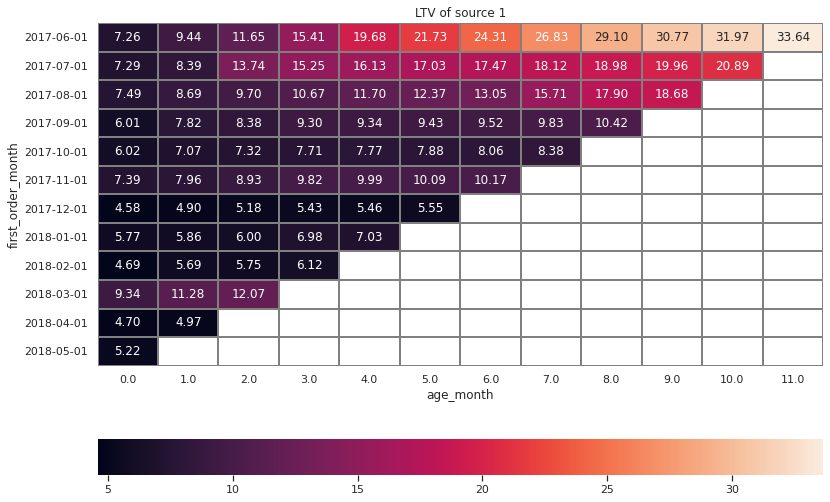

2 (3506, 12)


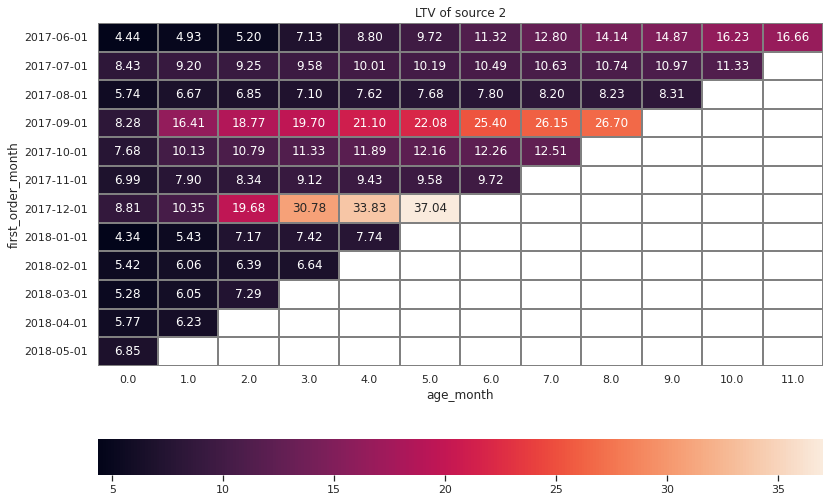

3 (10473, 12)


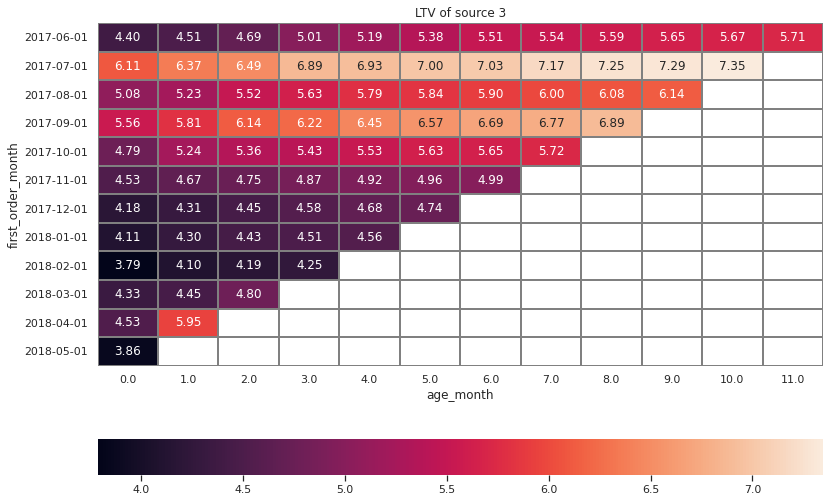

4 (10296, 12)


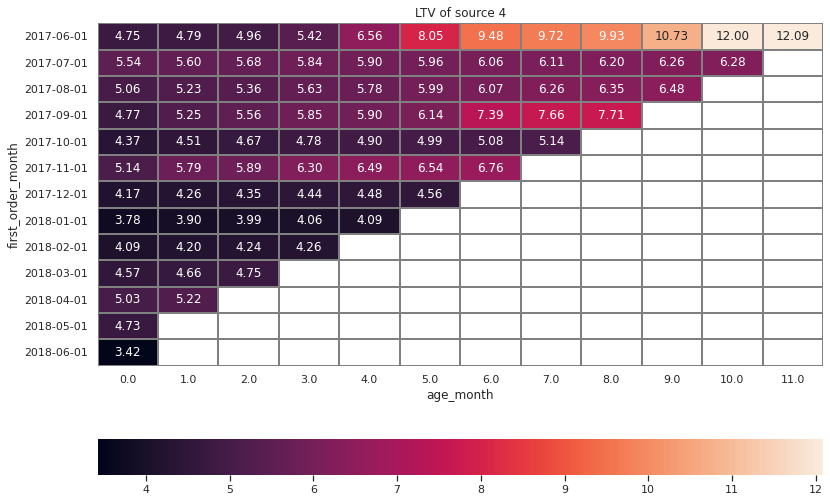

5 (6931, 12)


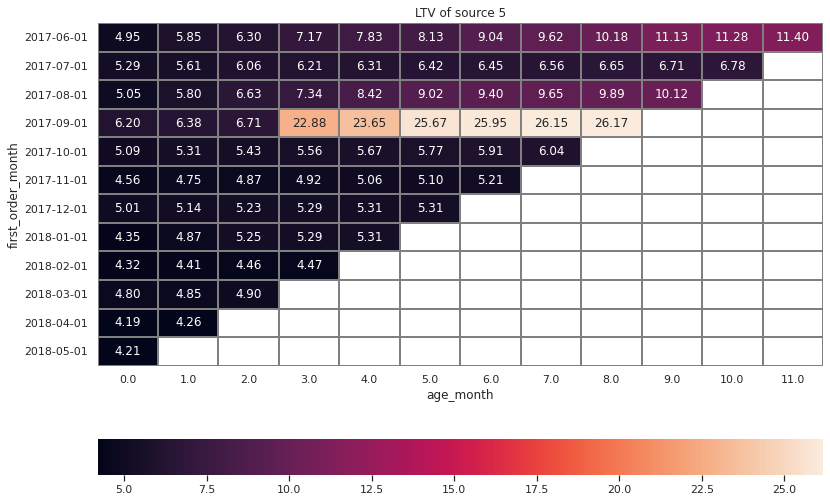

7 (1, 12)


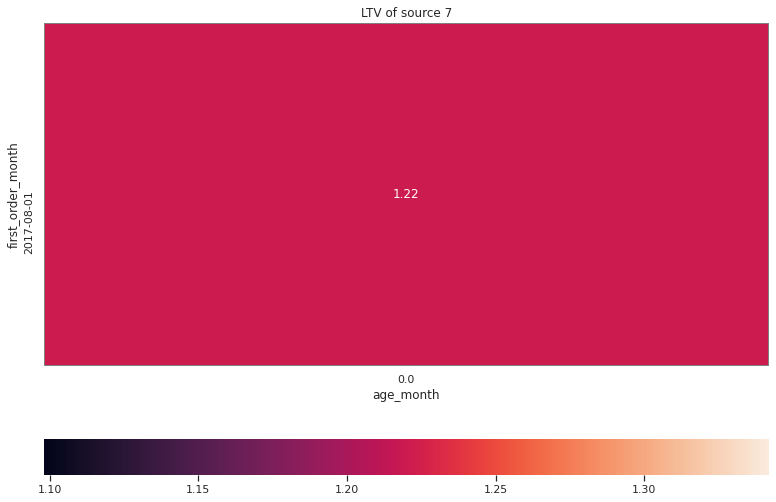

9 (1088, 12)


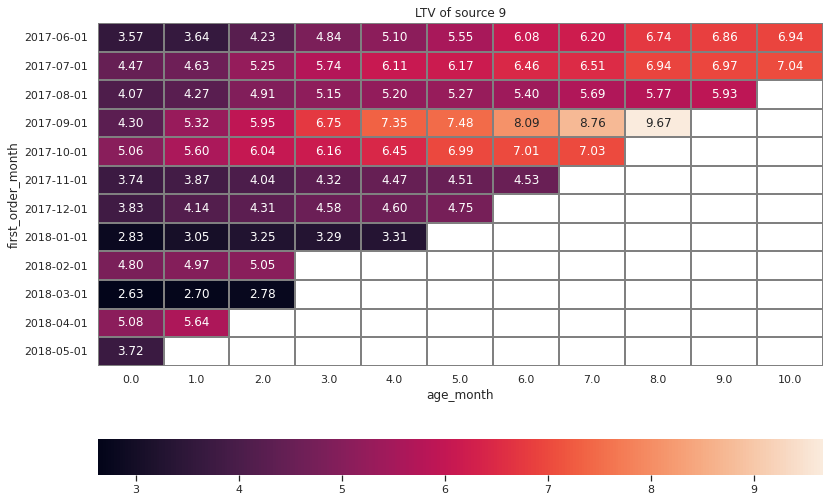

10 (1329, 12)


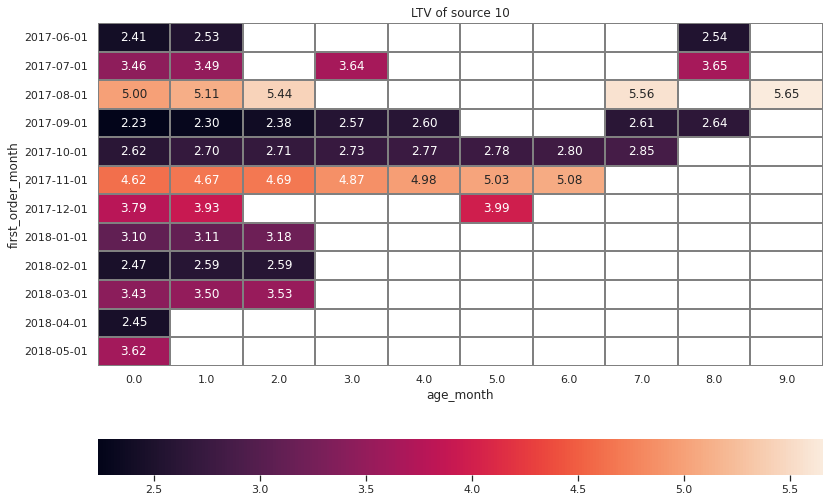

In [110]:
# compare CAC to LTV
#find LTV

ltv = {}

for source, df in buyers.groupby('source_id'):
    print(source, df.shape)
#cohorts are grouped by first order month
    cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
#merge cohorts into df 
#group by first order month, and order month
#revenue sum and count
    cohorts = pd.merge(orders, df, how='inner', on='uid')\
    .groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': ['sum', 'count']}).reset_index()
#age is any order momth - first order month
#rename columns
    cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']
#merge cohorts on the first order month 
#revenue per buyer = revenue/#of buyers
#orders per buyer = #of orders/ #of buyers
    cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
    cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

    #monthly cumulative revenue per user

    cohorts_age = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='rev_per_buyer', 
        aggfunc='sum'
    ).cumsum(axis=1)
    
    
    plt.figure(figsize=(13, 9))
    sns.heatmap(cohorts_age, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title =('LTV of source {}'.format(source)), yticklabels = cohorts_age.index.astype('str'))
    plt.show()

    
    
    try: 
        ltv[source] = cohorts_age[5].mean()
    except KeyError:
        pass

   

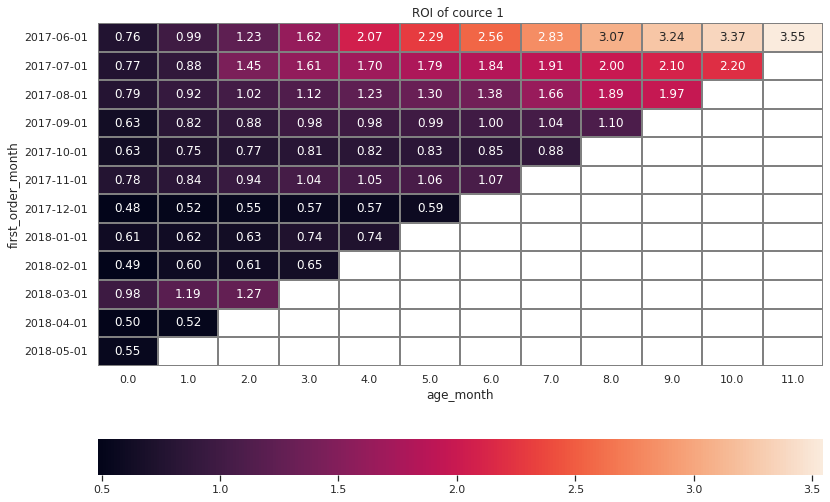

Mean ROI for 6 months:  1.27


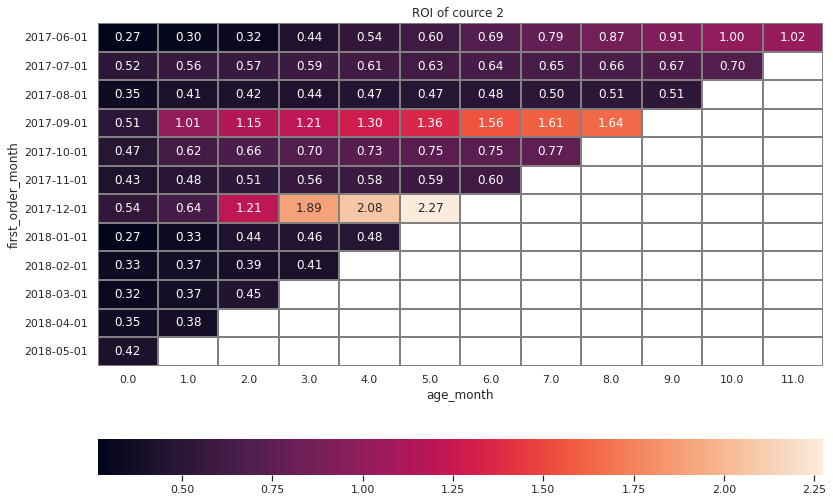

Mean ROI for 6 months:  0.95


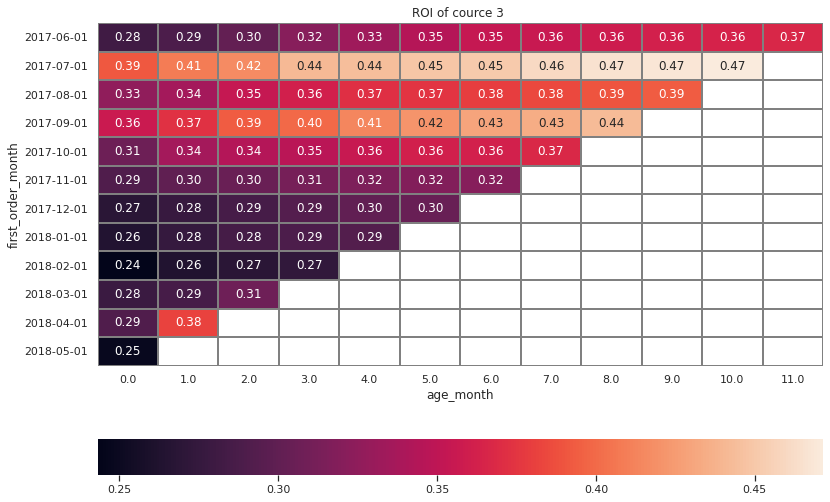

Mean ROI for 6 months:  0.37


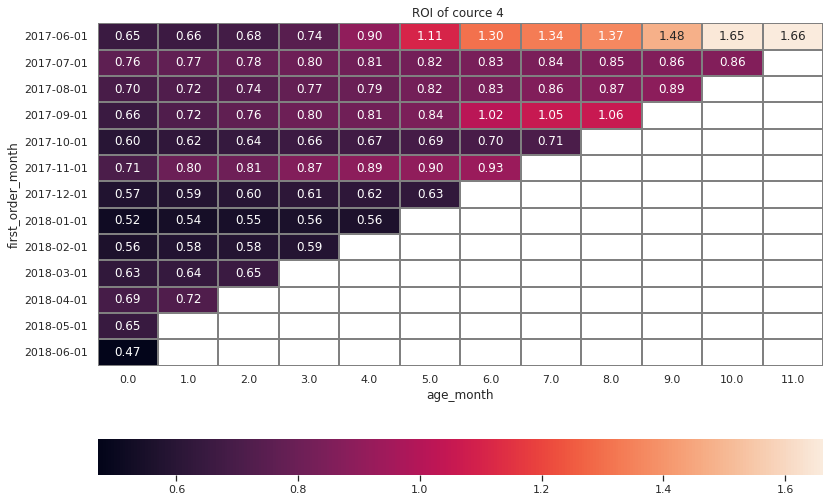

Mean ROI for 6 months:  0.83


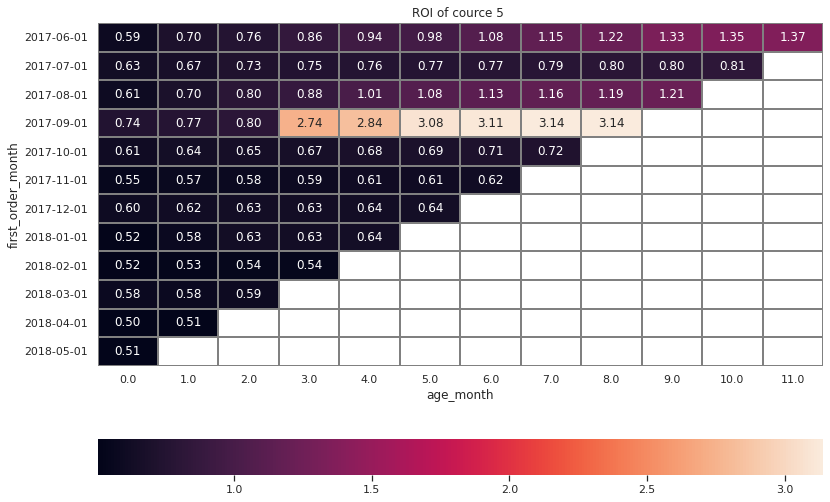

Mean ROI for 6 months:  1.12


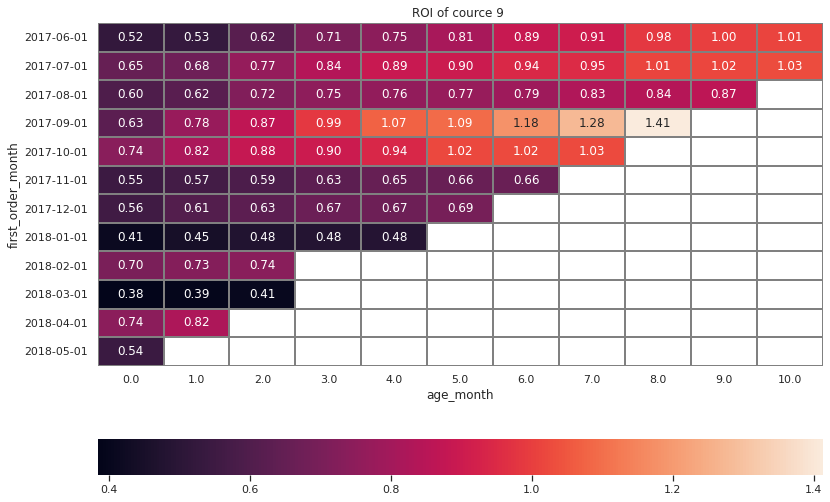

Mean ROI for 6 months:  0.85


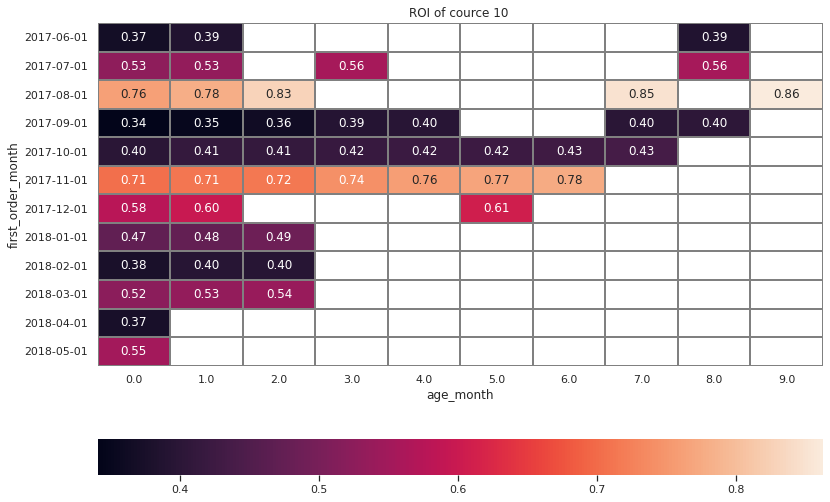

Mean ROI for 6 months:  0.6


In [111]:
roi = {}

for source, df in buyers[buyers['source_id'].isin(ltv.keys())].groupby('source_id'):

    cohort_sizes = df.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

    cohorts = pd.merge(orders, df, how='inner', on='uid')\
    .groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': ['sum', 'count']}).reset_index()

    cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']

    cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')

    cac = costs_.groupby('source_id').agg({'costs_per_buyer': 'mean'})['costs_per_buyer'][source]

    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers'] / cac


    cohorts_age = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='age_month', 
        values='rev_per_buyer', 
        aggfunc='sum'
    ).cumsum(axis=1)

    plt.figure(figsize=(13, 9))
    sns.heatmap(cohorts_age, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title =('ROI of cource {} '.format(source)), yticklabels = cohorts_age.index.astype('str'))
    plt.show()

    
    
    try: 
        roi[source] = round(cohorts_age[5].mean(),2)
        print('Mean ROI for 6 months: ', roi[source])      
    except KeyError:
        pass

## Conclusion: advise marketing experts how much money to invest and where

### Which marketing source is best, and how much money to invest:

Different sources of marketing are being used in our modern day. Different examples of a marketing source can be ads, social media, emails, and blog, etc. If ROMI of 100%, the marketing investments pay off without any profit. If your ROMI is below 100% it means the marketing investments don’t pay off. Now that I've found ROMI, I can reallocate the investments into more cost-effective channels.

Sources 2, 3, 9, and 10 are below 100%. Source 3 is the lowest ROMI, 38%. My first reccomendation would be reallocate the funds dedicated for this marketing source, and add it to Source 1, since it has the highest ROMI. I would also suggest reinvesting the funds of sources 9 and 10 into Source 3. 

But why not invest in sources 2, 4, and 5 if they are near or over 100%? They are not bringing any(or much) profit - yet. I would suggest investing the same amount of money in these sources, and continue to conduct a monthly analysis over the next year. I want to study the ROMI of sources 2, 4, and 5. Do they increases or decreases over the next year? If ROMI > 100%, I will revisit the idea of investing more marketing funds. As long as Source 1 continues to return at this rate(preferably at a increasingly higher rate), it will be our primary source. Our goal is to get sources 2, 4, and 5 a higher return rate each month. 

### The process: How did I come to this conclusion ?

For the INTRO portion, I imported libraries, downloaded three dataframes (visits, orders, costs), studied the dataframe, and prepared the dataframes for analysis. In this section, I change column names using snakecase, lowercase, and renaming. I also change datatypes, to_datetimne or category, so I can operate proper analysis. 

For PRODUCT portion of the project, I found how many people use the product daily, weekly, monthly. I determined how many sessions per user per month, and average session duration. With this information I was able to calculate the #of users that come back within the first month of their first visit. The percentage of users that come back within the first month of their first visit fluctuates between 8% - 4%. It's important to notice 2018 has lower retention rates than 2017 on average. I need to address the delcining retention rate and discover a solution.

For SALES portion of the project, I found daily, weekly, and monthly revenue for Afisha. Then I was able to calculate the average size of a purchase. I discovered the #of days between users first visit and their first order. Finally, for this secetion, I got the #of orders a single user usually makes, and the revenue they bring, over a six month period, after their firt order. Customer behavior is imporant to determine when making finincial decisions, especially whe considering marketing costs. We want to target the customers with the highest revenue within the 6 month time period to see what is working well. With the same logic, the users with lowest revenue could reveal what is not working well.

For MARKETING portion of the project, I calculated the total sum Afisha spends on marketing. From there, I got the CAC, the cost it takes to acquire a customer. Finding the CAC of each marketing source helps me analyze which source is most cost efficient. The information will be used to determine the ROMI for each marketing source. 